In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Task 1:
Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [7]:
# import libraries for training and evaluating models
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [20]:
# generate linear separable random numbers
def linear_separable_data(n_samples):

    data = np.random.normal(0, 10, (n_samples, 2))
    data[:n_samples // 2] -= 15
    data[n_samples // 2:] += 15

    labels = np.ones(n_samples)
    labels[:n_samples // 2] = -1

    return data, labels

X, y = linear_separable_data(100)

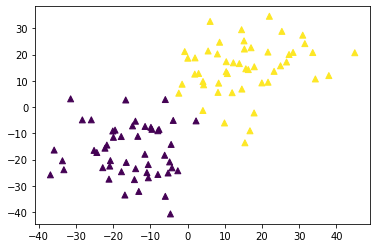

In [21]:
# plot generated dataset
plt.scatter(X[:, 0], X[:, 1], c=y, marker='^')
plt.show()

In [22]:
X = pd.DataFrame(X, columns=['f1', 'f2'])
X.head()

,f1,f2
0,-13.122396,-32.098697
1,-5.995920,-33.965873
2,-10.938670,-24.931179
3,-20.747931,-20.360142
4,-4.615426,-40.659509


In [23]:
print("shape--> X : ", X.shape)
print("shape--> y : ", y.shape)

shape--> X :  (100, 2)
shape--> y :  (100,)


In [24]:
# unique values in y: --> classes where will data_points in X value belong to.
np.unique(y)

array([-1.,  1.])

In [25]:
# setting hyperparameters for different classifiers
lr_svc = LinearSVC(C=0.01, max_iter=100000)
svc = SVC(C=0.1, kernel='rbf', gamma=0.001)
sgd_c = SGDClassifier(loss='hinge', epsilon=0.001)

In [27]:
# checking algorithms' scores through cross validation
svc_score = cross_val_score(svc, X, y, cv=5, scoring='f1')
sgd_c_score = cross_val_score(sgd_c, X, y, cv=5, scoring='f1')
lr_svc_score = cross_val_score(lr_svc, X, y, cv=5, scoring='f1')


In [28]:
print("Linear SVC f1 mean score: ", lr_svc_score.mean())
print("SVC f1 mean score: ", svc_score.mean())
print("SGD f1 mean score: ", sgd_c_score.mean())



Linear SVC f1 mean score:  1.0
SVC f1 mean score:  1.0
SGD f1 mean score:  1.0


# Task 2:
Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [29]:
# import libraries for training and evaluating models
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [32]:
# import MNIST dataset
from sklearn.datasets import load_digits
mnist = load_digits()

In [33]:
X = pd.DataFrame(mnist.data)
y = mnist.target


In [34]:
# tuning parameters with RandomizedSearchCV
svm_clf = SVC( )

kernel = ['linear', 'poly', 'rbf']
tol = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
gamma = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

hyperparameters = {'C': C,
                   'kernel': kernel,
                   'tol': tol,
                   'gamma': gamma}

rsearch = RandomizedSearchCV(svm_clf, hyperparameters, n_iter=100, random_state=42)
rsearch.fit(X, y)
rsearch.best_params_

{'tol': 0.01, 'kernel': 'rbf', 'gamma': 0.001, 'C': 1}

In [35]:
# checking accuracy with KFold cross validation
kf =KFold(n_splits=10, shuffle=True, random_state=42)

# Support Vector Machine Classifier with tuned hyperparameters
svm_clf = SVC(C=1, kernel='rbf', gamma=0.001, tol=0.01)

svm_clf_acuuracy = cross_val_score(svm_clf, X, y, cv=kf, scoring='accuracy')

In [36]:
print("SVM classifier accuracy score: ", svm_clf_acuuracy.mean())


SVM classifier accuracy score:  0.9905400372439479


make binary prediction


In [37]:
# chose digit 0 from data
some_digit = X[:1]
y_0 = (y==0)

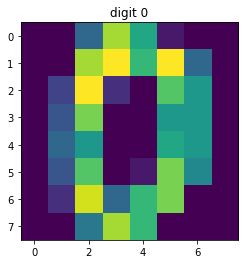

In [38]:
# show the chosen digit
zero = some_digit.values.reshape(8, 8)
plt.imshow(zero)
plt.title('digit 0')
plt.show()

In [39]:
# predict through cross validation
svm_clf = SVC(C=1, kernel='rbf', gamma=0.001, tol=0.01)
y_0_pred = cross_val_predict(svm_clf, X, y_0, cv=kf)


In [40]:
# checking amount of right predictions
all_0_digits = len(y[y==0])
predicted_number_of_0 = len(y_0_pred[y_0_pred==True])
print('Numer of all 0 digits: ', all_0_digits)
print('Right predicted number of 0 digits: ', predicted_number_of_0)


Numer of all 0 digits:  178
Right predicted number of 0 digits:  177


# Task 3:
Train an SVM regressor on the California housing dataset

In [41]:
# import libraries for training and evaluating models
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [42]:
# import California housing dataset
from sklearn.datasets import fetch_california_housing
CF_house_data = fetch_california_housing()
CF_house_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [43]:
X = pd.DataFrame(CF_house_data['data'], columns=CF_house_data.feature_names)
y = CF_house_data.target

In [44]:
print('Shape of data: ', X.shape)
print('Shape of target: ', y.shape)


Shape of data:  (20640, 8)
Shape of target:  (20640,)


In [45]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [46]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [47]:
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [48]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [49]:
# split data into train and test sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# scale the values
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = StandardScaler().fit_transform(y_train.reshape(-1, 1))
y_test = StandardScaler().fit_transform(y_test.reshape(-1, 1))



In [51]:
# train the model
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train.ravel())

SVR()

In [53]:
# make predictions
y_pred = svm_reg.predict(X_test)

In [56]:
# check scores

print('SVM Regression R2_score: ', r2_score(y_test, y_pred))
print('SVM Regression RMSE score: ', np.sqrt(mean_squared_error(y_test, y_pred)))



SVM Regression R2_score:  0.28569106136778066
SVM Regression RMSE score:  0.8451679943255183
